# Text Summarization Project - ASHO

## Introduction

In this notebook we are going to perform Text Summarization using ...


## Required Libraries

In [2]:
import json
import nltk
import matplotlib.pyplot as plt

## Data Analysis

In [3]:

data_path = 'uab_summary_2024_all.json'
data = json.load(open(data_path))

In [4]:
# Let's explore the data
print(len(data))

print(data[0].keys())

summary_lens = [len(sample['Summary']) for sample in data]
print(f"Maximum length in Summaries: {max(summary_lens)}, minimum length: {min(summary_lens)}, average length: {sum(summary_lens) / len(summary_lens)}")

text_lens = [len(sample['Text']) for sample in data]
print(f"Maximum length in Texts: {max(text_lens)}, minimum length: {min(text_lens)}, average length: {sum(text_lens) / len(text_lens)}")


100
dict_keys(['Id', 'Summary', 'Text'])
Maximum length in Summaries: 1022, minimum length: 0, average length: 58.68
Maximum length in Texts: 25995, minimum length: 660, average length: 7091.82


[('*', 45739), ('.', 5942), (':', 5693), ('de', 4697), (',', 4622), ('en', 1973), ('y', 1639), ('-', 1586), ('con', 1547), ('a', 1362), ('no', 1103), ('se', 1061), (')', 1053), ('la', 1049), ('(', 1018), ('%', 810), ('por', 766), ('sin', 755), ('que', 674), ('el', 652), ('data', 618), ('alta', 577), (';', 550), ('1', 500), ('informe', 397), ('del', 376), ('tratamiento', 342), ('i', 330), ('paciente', 324), ('ni', 322), ('edat', 302), ('2', 300), ('cip', 300), ('sexe', 297), ('pagina', 294), ('3', 290), ('para', 283), ('|', 271), ('al', 266), ('servei', 261), ('hospitalitzacio', 258), ('dolor', 230), ('control', 223), ('&', 221), ('ingreso', 215), ('signos', 212), ('adreça', 199), ('cp', 199), ('mg/dl', 192), ('pcr', 191)]


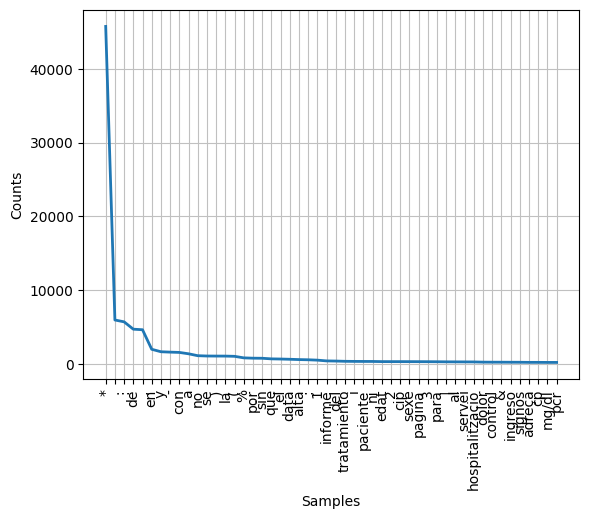

<Axes: xlabel='Samples', ylabel='Counts'>

In [5]:
# Tokenize the text to get the vocabulary and plot the frequency distribution

text = ' '.join([sample['Text'] for sample in data])

tokens = nltk.word_tokenize(text)
fdist = nltk.FreqDist(tokens)

print(fdist.most_common(50))

fdist.plot(50, cumulative=False)



[('data', 618), ('alta', 577), ('1', 500), ('informe', 397), ('tratamiento', 342), ('i', 330), ('paciente', 324), ('edat', 302), ('2', 300), ('cip', 300), ('sexe', 297), ('pagina', 294), ('3', 290), ('servei', 261), ('hospitalitzacio', 258), ('dolor', 230), ('control', 223), ('ingreso', 215), ('signos', 212), ('adreça', 199), ('cp', 199), ('mg/dl', 192), ('pcr', 191), ('abdominal', 191), ('analitica', 185), ('hb', 182), ('hora', 173), ('normal', 172), ('pacient', 171), ('tel', 170), ('telefon', 170), ('mg', 169), ('nass', 169), ('unitat', 167), ('naix', 166), ('admissio', 166), ("d'impressio", 166), ('clinica', 165), ('24', 161), ('hores', 160), ('dona', 157), ('4', 156), ('evolucion', 154), ('poblacio', 152), ('fg', 146), ('aguda', 141), ('ccee', 141), ("d'alta", 138), ('gt', 135), ('home', 132)]


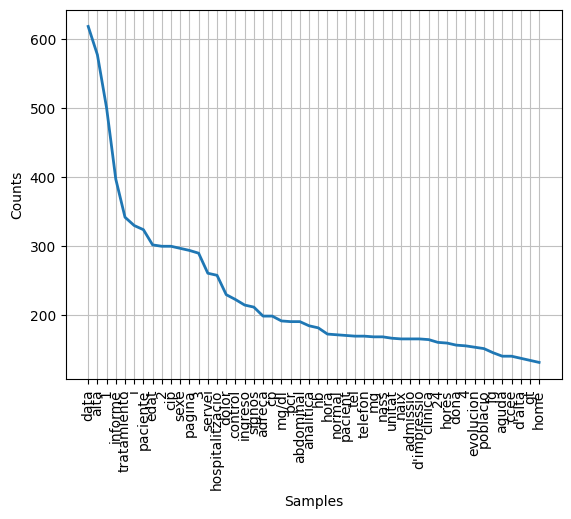

<Axes: xlabel='Samples', ylabel='Counts'>

In [6]:
# Removo stopwords (spanish words) and punctuation and plot the frequency distribution again

from nltk.corpus import stopwords
from string import punctuation

stop_words = set(stopwords.words('spanish'))
punctuation = set(punctuation)

filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token not in punctuation]

fdist = nltk.FreqDist(filtered_tokens)

print(fdist.most_common(50))

fdist.plot(50, cumulative=False)

[(('adreça', 'cp'), 196), (('pacient', 'cip'), 166), (('cip', 'data'), 166), (('data', 'naix'), 166), (('tel', 'admissio'), 166), (('data', 'i'), 166), (('i', 'hora'), 166), (('hora', "d'impressio"), 166), (('informe', 'alta'), 166), (('alta', 'hospitalitzacio'), 165), (('sexe', 'dona'), 157), (('nass', 'adreça'), 152), (('cp', 'poblacio'), 152), (('poblacio', 'tel'), 152), (('sexe', 'home'), 132), (('data', 'naixement'), 131), (('cip', 'cognoms'), 130), (('cognoms', 'nom'), 130), (('nom', 'sexe'), 123), (('email', 'ccee'), 123), (('ccee', 'vallhebron.cat'), 123), (('vallhebron.cat', 'telefon'), 123), (('24', 'hores'), 117), (('anys', 'nif/dni'), 109), (('home', 'nass'), 98), (('pagina', '1'), 95), (('dona', 'data'), 89), (('pagina', '2'), 88), (('servei', 'hdouohmb'), 87), (('hdouohmb', 'hospitalitzacio'), 87), (('hospitalitzacio', 'domicili'), 87), (('1', 'comprimit'), 86), (('dolor', 'abdominal'), 78), (('telefon', 'informe'), 74), (('servei', 'geruohmb'), 72), (('geruohmb', 'geriat

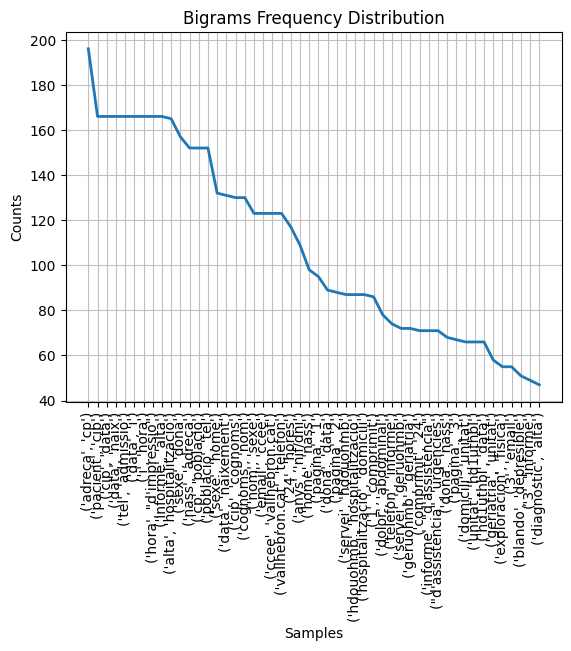

[(('pacient', 'cip', 'data'), 166), (('cip', 'data', 'naix'), 166), (('data', 'i', 'hora'), 166), (('i', 'hora', "d'impressio"), 166), (('informe', 'alta', 'hospitalitzacio'), 165), (('nass', 'adreça', 'cp'), 152), (('adreça', 'cp', 'poblacio'), 152), (('cp', 'poblacio', 'tel'), 152), (('poblacio', 'tel', 'admissio'), 152), (('cip', 'cognoms', 'nom'), 130), (('cognoms', 'nom', 'sexe'), 123), (('email', 'ccee', 'vallhebron.cat'), 123), (('ccee', 'vallhebron.cat', 'telefon'), 123), (('sexe', 'home', 'nass'), 98), (('home', 'nass', 'adreça'), 93), (('nom', 'sexe', 'dona'), 89), (('sexe', 'dona', 'data'), 89), (('dona', 'data', 'naixement'), 89), (('servei', 'hdouohmb', 'hospitalitzacio'), 87), (('hdouohmb', 'hospitalitzacio', 'domicili'), 87), (('vallhebron.cat', 'telefon', 'informe'), 74), (('servei', 'geruohmb', 'geriatria'), 72), (('comprimit', '24', 'hores'), 71), (('informe', "d'assistencia", 'urgencies'), 71), (('sexe', 'dona', 'nass'), 68), (('hospitalitzacio', 'domicili', 'unitat'

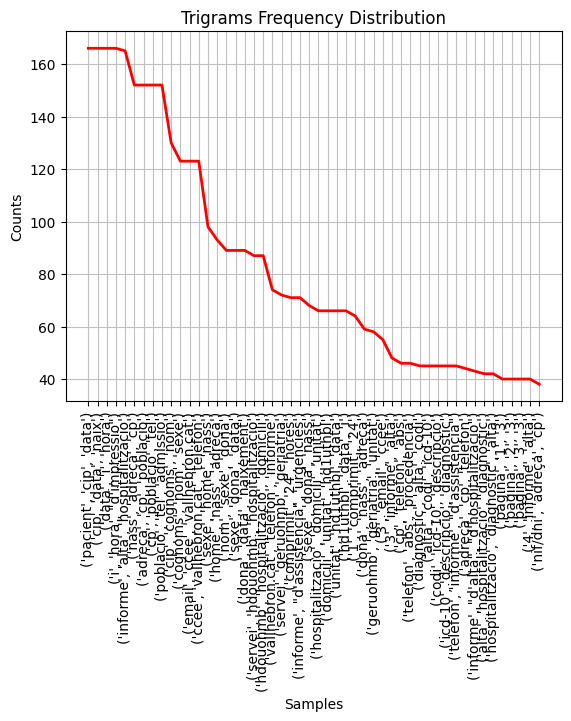

<Axes: title={'center': 'Trigrams Frequency Distribution'}, xlabel='Samples', ylabel='Counts'>

In [7]:
# N-grams Analysis

# Get the bigrams from the text
bigrams = nltk.bigrams(filtered_tokens)

# Get the trigrams from the text
trigrams = nltk.trigrams(filtered_tokens)

# Get the frequency distribution of the bigrams
fdist_bigrams = nltk.FreqDist(bigrams)

print(fdist_bigrams.most_common(50))

fdist_bigrams.plot(50, cumulative=False, title='Bigrams Frequency Distribution')

# Get the frequency distribution of the trigrams
fdist_trigrams = nltk.FreqDist(trigrams)

print(fdist_trigrams.most_common(50))

fdist_trigrams.plot(50, cumulative=False, title='Trigrams Frequency Distribution', color='red')

In [8]:
#Show the first 5 elements of the data to see the structure
for i in range(5):
    print(data[i])
    
#Count the number of samples with a summary length greater than 10
count = 0
for sample in data:
    if len(sample['Summary']) > 10:
        count += 1

print(f"Number of samples with a summary length greater than 10: {count}")

#store those entries that have a summary length greater than 10, save the whole data in a new file
new_data = [sample for sample in data if len(sample['Summary']) > 10]

#save the new data in a new file
new_data_path = 'uab_summary_2024_with_gt.json'
json.dump(new_data, open(new_data_path, 'w'))



{'Id': '1006971397', 'Summary': '', 'Text': " diagnostic alta codi icd-10 descripcio diagnostic e27.2 crisi addisoniana a18.7 tuberculosi de glandules suprarenals dades informe paciente de 27 años ingresada por insuficiencia suprarenal primaria -procendecia: natural de bolivia: 2 años en españa. antecedentes patologicos: - posible alergia a buscapina - no fumador ni otros habitos toxicos. - tac lumbar 2021: pequeña hernia discal l5-s1 sin compromiso de estructuras neurologicas. - laboral: aislamiento termico de hogares. - convive con su mujer (sana) y una hija de 1 año. - mascotas: 1 hamster - tatuajes: si - no viajes recientes. tratamiento actual: - omeprazol 20 mg cada 12 horas. - almax: 1-1-1 enfermedad actual: el paciente inicia a principios de abril cuadro de diarreas, principalmente, con algun vomito. se pauto ciprofloxacino. inicio estudio en cruz blanca. - gastroscopia-colonoscopia 30 mayo 2023:colonoscopia normal (biopsias seriadas de colon para descartar colitis microscopica)

In [9]:
data_with_gt_path = 'uab_summary_2024_with_gt.json'
data_with_gt = json.load(open(data_with_gt_path))

print(len(data_with_gt))

10


In [10]:
for element in data_with_gt[0].items():
    print(element)

('Id', '1006949703')
('Summary', '\n\n\n\nPaciente que ingresa por deterioro de estado general manifestado por disnea, astenia, edema y somnolencia con antecedentes de hipertensión arterial, EPOC, colitis isquémica, cirrosis hepática enólica, encefalopatía hepática y ERC. Durante el ingreso las pruebas exploratorias realizadas muestran cardiopatía hipertensiva, insuficiencia renal aguda de posible causa prerrenal e hipertensión portal sinuosidal. El diagnóstico se orienta a insuficiencia renal aguda en paciente con enfermedad renal cronica, sobrecarga de volúmen, insuficiencia respiratoria mixta y fiebre lo cual se decide tratar con diuréticos, antibióticos y oxigenoterapia con buena respuesta. Debido a la mejoría clínica del paciente  se procede al alta bajo seguimiento de especialistas y tratamiento farmacológico habitual. \n\n\n')
('Text', " diagnostic alta codi icd-10 descripcio diagnostic k70.3 cirrosi hepatica alcoholica r18.8 altres tipus d'ascites dades informe motivo de ingres

In [11]:
for element in data_with_gt[1].items():
    print(element)

('Id', '1006962381')
('Summary', '\n\nPaciente que ingresa por pérdida del conocimiento, astenia y rectorragia con antecedentes de hipertensión arterial, dislipemia, diabetes insulinodependiente,  cardiopatía isquémica, deterioro cognitivo, síndrome ansioso-depresivo y apendicectomía. Durante su estancia las pruebas complementarias realizadas no muestran un foco activo de sangrado. Se objetiva anemia secundaria a hemorragia aguda lo cual se corrige hemoderivados,  marcada leucocitosis con picos febriles cuyo unico foco aparente es la flebitis con buena respuesta a antibiótico, ajuste del tratamiento insulínico por difícil control glucémico y RAO resuelto con sondaje vesical.  Aunque la paciente muestra una mejoría clínica,  debido al deterioro funcional durante el ingreso se decide derivación a centro para recuperación funcional y seguimiento por especialistas con diagnóstico de hemorragia digestiva alta. ')
('Text', " diagnostic alta codi icd-10 descripcio diagnostic k92.2/3 hemorragi

In [12]:
for i in data_with_gt:
    print(f'Example {data_with_gt.index(i)}:')
    for element in i.items():
        print(element)
        
    print("---------------------------------------")

Example 0:
('Id', '1006949703')
('Summary', '\n\n\n\nPaciente que ingresa por deterioro de estado general manifestado por disnea, astenia, edema y somnolencia con antecedentes de hipertensión arterial, EPOC, colitis isquémica, cirrosis hepática enólica, encefalopatía hepática y ERC. Durante el ingreso las pruebas exploratorias realizadas muestran cardiopatía hipertensiva, insuficiencia renal aguda de posible causa prerrenal e hipertensión portal sinuosidal. El diagnóstico se orienta a insuficiencia renal aguda en paciente con enfermedad renal cronica, sobrecarga de volúmen, insuficiencia respiratoria mixta y fiebre lo cual se decide tratar con diuréticos, antibióticos y oxigenoterapia con buena respuesta. Debido a la mejoría clínica del paciente  se procede al alta bajo seguimiento de especialistas y tratamiento farmacológico habitual. \n\n\n')
('Text', " diagnostic alta codi icd-10 descripcio diagnostic k70.3 cirrosi hepatica alcoholica r18.8 altres tipus d'ascites dades informe motiv

Let's clean the dataset

In [13]:
import json
import re

# Function to clean text
def clean_text(text):
    # Remove unwanted characters and symbols
    text = re.sub(r'[\u00a0\u00ad\u200b\u200c\u200d\u202a-\u202e]', '', text)  # Removing non-breaking spaces and soft hyphens
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'\n', ' ', text)  # Remove newline characters
    text = re.sub(r'[*]', '', text)  #remove * characters
    return text.strip()

# Load the dataset
with open('uab_summary_2024_all.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Clean the data
for entry in data:
    entry['Text'] = clean_text(entry['Text'])

# Save the cleaned dataset
with open('uab_summary_2024_all_clean.json', 'w', encoding='utf-8') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)

print("Dataset cleaned and saved as 'uab_summary_2024_all_clean.json'")


Dataset cleaned and saved as 'uab_summary_2024_all_clean.json'


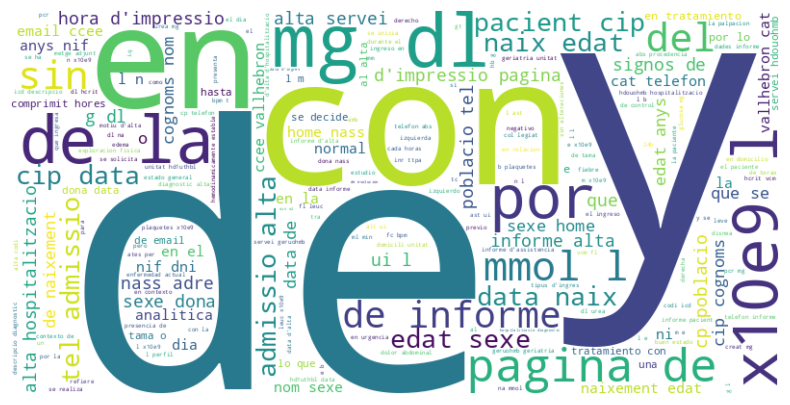

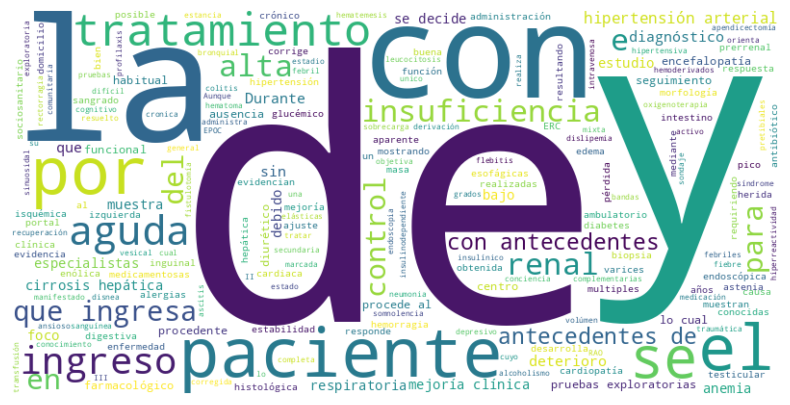

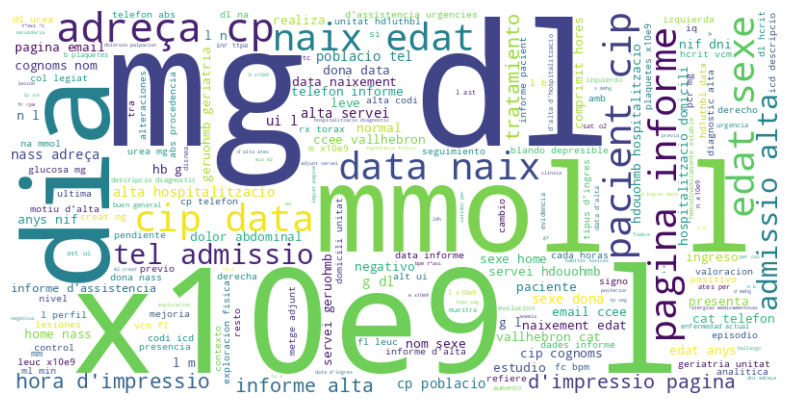

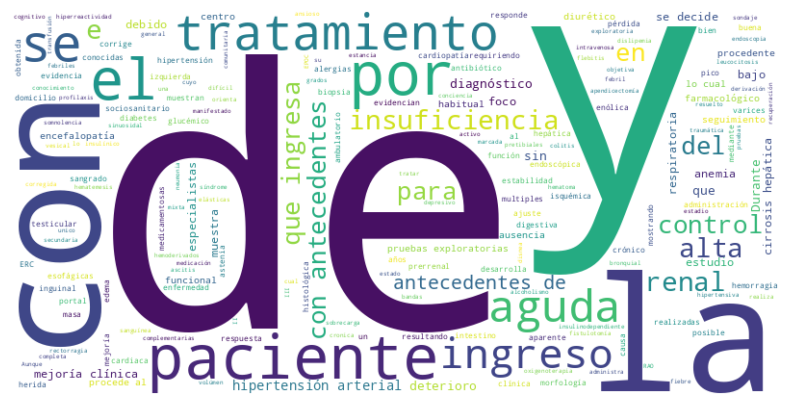

In [15]:
# Create a word cloud of the text data

from wordcloud import WordCloud

text = ' '.join([sample['Text'] for sample in data])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Create a word cloud of the summary data

text = ' '.join([sample['Summary'] for sample in data])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Create a word cloud of the text data without stopwords

from nltk.corpus import stopwords
from string import punctuation

stop_words = set(stopwords.words('spanish'))
punctuation = set(punctuation)

filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token not in punctuation]

text = ' '.join(filtered_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Create a word cloud of the summary data without stopwords

text = ' '.join([sample['Summary'] for sample in data])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

